<a href="https://colab.research.google.com/github/Diwakar888/boardreview/blob/master/board.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [0]:
game = pd.read_csv('games.csv')

In [115]:
game.tail(45)

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
81267,184222,boardgameexpansion,Dice Brewing: Upgrade Kit,2015.0,2.0,4.0,90.0,45.0,90.0,12.0,0,0.0,0.0,1,0,0,2,0,0,0.0
81268,184223,boardgame,Drink-a-palooza,2012.0,2.0,12.0,120.0,30.0,120.0,21.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81269,184229,boardgame,Vier im Zoo,2015.0,2.0,4.0,20.0,5.0,20.0,5.0,0,0.0,0.0,1,0,0,0,0,0,0.0
81270,184245,boardgame,Space Junkers,0.0,2.0,4.0,30.0,20.0,30.0,13.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81271,184246,boardgame,Snog Marry Shove,2009.0,2.0,8.0,0.0,0.0,0.0,18.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81272,184247,boardgame,EXO,2016.0,1.0,4.0,180.0,60.0,180.0,10.0,0,0.0,0.0,0,0,0,1,0,0,0.0
81273,184248,boardgame,Sheep Happens,2015.0,2.0,5.0,45.0,30.0,45.0,14.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81274,184250,boardgame,Nextbol,2014.0,2.0,4.0,60.0,5.0,60.0,8.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81275,184251,boardgame,3 Monkeys,2015.0,3.0,10.0,20.0,10.0,20.0,8.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81276,184253,boardgameexpansion,Elder Sign: Arkham Nights 2015 Promotional Anc...,2015.0,1.0,8.0,0.0,90.0,0.0,14.0,0,0.0,0.0,0,0,1,7,0,0,0.0


(array([24380.,   606.,  1325.,  3303.,  6687., 12277., 15849., 11737.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

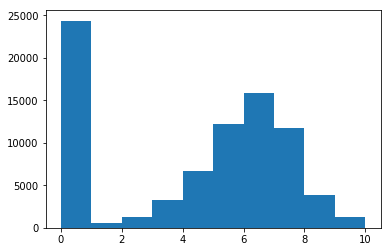

In [116]:
 plt.hist(game['average_rating'])

In [55]:
game.shape

(81312, 20)

In [0]:
game = game[game['users_rated']>0]

In [0]:
game = game.dropna(axis=0)

In [58]:
game.shape

(56894, 20)

(array([  602.,  1231.,  2824.,  5206.,  8223., 13593., 13849.,  8470.,
         2224.,   672.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

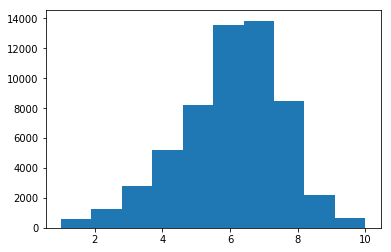

In [119]:
plt.hist(game['average_rating'])

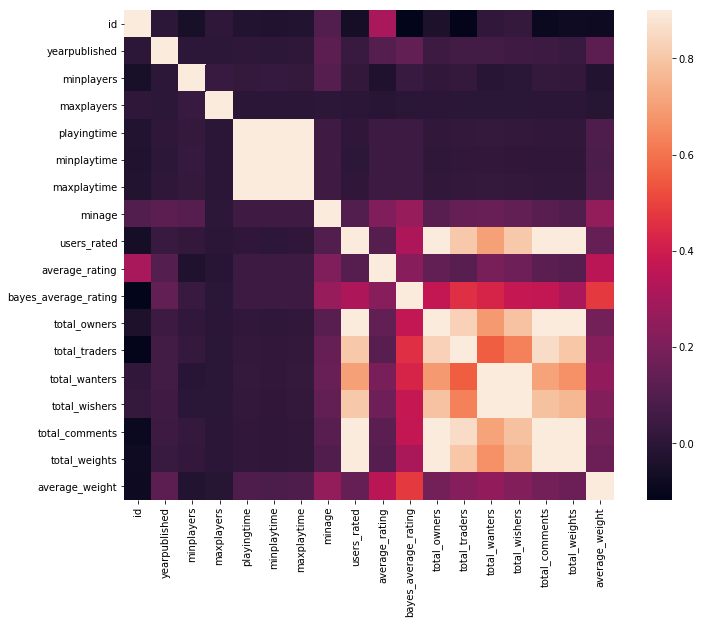

In [120]:
corre = game.corr()
fig = plt.figure(figsize =(12,9))

sns.heatmap(corre,vmax = .9 , square = True)





In [121]:
 game.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [0]:
x = game.drop(columns =['id','type','name','average_rating','bayes_average_rating'] ,axis = 1)


In [0]:

y = game['average_rating']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test = train_test_split (x,y ,test_size = 0.33, random_state = 101)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn .metrics import mean_squared_error

In [0]:
lr = LinearRegression()

In [141]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
pre = lr.predict(x_test)

In [143]:
mean_squared_error(pre,y_test)

2.1143212918195315

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rfr = RandomForestRegressor(n_estimators=100 , min_samples_leaf= 10 ,random_state=101)
                          

In [151]:
rfr.fit(x_train , y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=101, verbose=0, warm_start=False)

In [0]:
predection = rfr.predict(x_test)

In [154]:
mean_squared_error(predection,y_test)

1.4735766449097367

In [170]:
x_test.iloc[6600]

yearpublished     2005.0000
minplayers           2.0000
maxplayers           2.0000
playingtime         20.0000
minplaytime         20.0000
maxplaytime         20.0000
minage               9.0000
users_rated       2127.0000
total_owners      2988.0000
total_traders      227.0000
total_wanters       91.0000
total_wishers      447.0000
total_comments     795.0000
total_weights      225.0000
average_weight       2.5644
Name: 1058, dtype: float64

In [0]:
ratinglr = lr.predict(x_test.iloc[6600].values.reshape(1,-1)) 
ratingrlr = rfr.predict(x_test.iloc[6600].values.reshape(1,-1))
  
  
  

In [173]:
ratinglr

array([6.30770845])

In [174]:
ratingrlr

array([6.89751761])

In [171]:
 y_test.iloc[6600]

6.6044